# Classifying Covid-19 Patient Risk

## Introduction

With the ongoing Covid-19 pandemic and the health-care system reaching capacity in multiple locations, it is critical that we determine what factors and symptoms of incoming patients make them more succeptable to death.  This analysis is aimed to guide the difficult decisions on who requires the now limited resources of our health-care system.  This notebook is a preliminary look into the data to help us understand these factors and build a model to support the assumptions of who is most vulnerable in this pandemic.  

## Additional References

https://plot.ly/python-api-reference/generated/plotly.express.scatter_geo.html

https://plot.ly/python/scatter-plots-on-maps/

https://blog.chezo.uno/tabula-py-extract-table-from-pdf-into-python-dataframe-6c7acfa5f302

https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports/

https://www.cdc.gov/sars/index.html

https://www.cdc.gov/coronavirus/mers/index.html

https://www.worldweatheronline.com/developer/api/docs/historical-weather-api.aspx

https://imbalanced-learn.org/stable/over_sampling.html
    
https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

https://xgboost.readthedocs.io/en/latest/parameter.html

https://xgboost.readthedocs.io/en/latest/python/python_intro.html

## Analysis

### Data Cleaning

#### Calling reference libraries and importing data [here](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
patient_data = pd.read_csv('Data/COVID19_line_list_data.csv')
display(
    patient_data.head(),
    patient_data.info(),
    patient_data.isna().mean(),
    patient_data.columns
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null object
Unnamed: 3               0 non-null float64
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null object
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null object
exposure_start           128 non-null object
exposure_end             341 non-null object
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
death                    1085 non-null object
recovered                1085 non-null object
symptom                  270 non-null object
source                   108

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


None

id                       0.000000
case_in_country          0.181567
reporting date           0.000922
Unnamed: 3               1.000000
summary                  0.004608
location                 0.000000
country                  0.000000
gender                   0.168664
age                      0.223041
symptom_onset            0.481106
If_onset_approximated    0.483871
hosp_visit_date          0.532719
exposure_start           0.882028
exposure_end             0.685714
visiting Wuhan           0.000000
from Wuhan               0.003687
death                    0.000000
recovered                0.000000
symptom                  0.751152
source                   0.000000
link                     0.000000
Unnamed: 21              1.000000
Unnamed: 22              1.000000
Unnamed: 23              1.000000
Unnamed: 24              1.000000
Unnamed: 25              1.000000
Unnamed: 26              1.000000
dtype: float64

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

#### Feature Selection

The scope of data available to us is large, so based on the outcome we are trying to achieve with the model, we need to select which features are best suited to make such a prediction that would be available to a hospital immediately upon accepting the new patient.  From this particular dataset, and with the previous statement in mind, we will keep "Age", "Gender", and "Symptoms" as our primary features.  "Summary" is also included since the symptom column is incomplete, and it looks like we can extract symptom data from the summary column.

Another feature I would have liked to include but was not very present in this dataset would be a time differential from when the patient was exposed to when they were admitted to the hospital for treatment.

In [3]:
keep_cols = ['age', 'gender', 'death', 'symptom', 'summary']
small_data = patient_data[keep_cols]
display(
    small_data,
    small_data.isna().mean()
)

,age,gender,death,symptom,summary
0,66.0,male,0,NaN,First confirmed imported COVID-19 pneumonia pa...
1,56.0,female,0,NaN,First confirmed imported COVID-19 pneumonia pa...
2,46.0,male,0,NaN,First confirmed imported cases in Zhejiang: pa...
3,60.0,female,0,NaN,new confirmed imported COVID-19 pneumonia in T...
4,58.0,male,0,NaN,new confirmed imported COVID-19 pneumonia in T...
...,...,...,...,...,...
1080,24.0,NaN,0,NaN,"new COVID-19 patient confirmed in Austria: 24,..."
1081,35.0,NaN,0,NaN,new COVID-19 patient confirmed in Afghanistan:...
1082,NaN,male,0,NaN,new COVID-19 patient confirmed in Algeria: mal...
1083,NaN,male,0,NaN,new COVID-19 patient confirmed in Croatia: mal...


age        0.223041
gender     0.168664
death      0.000000
symptom    0.751152
summary    0.004608
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


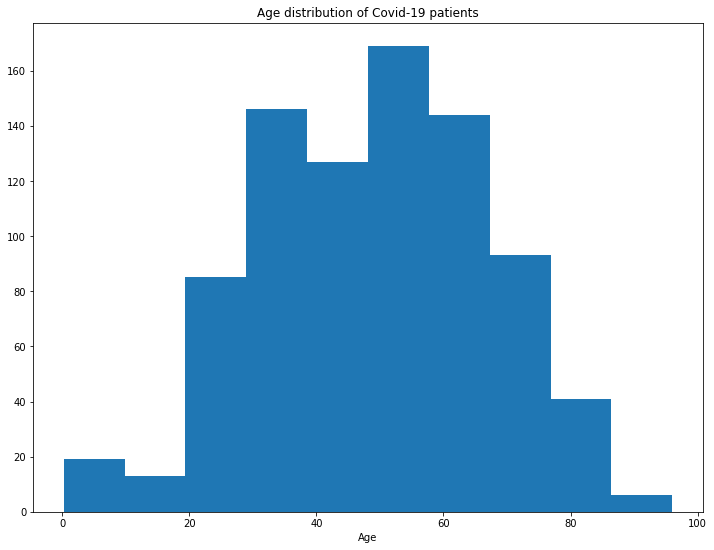

In [4]:
plt.figure(figsize=(12,9))
plt.hist(small_data['age'])
plt.xlabel('Age')
plt.title('Age distribution of Covid-19 patients')
plt.show()

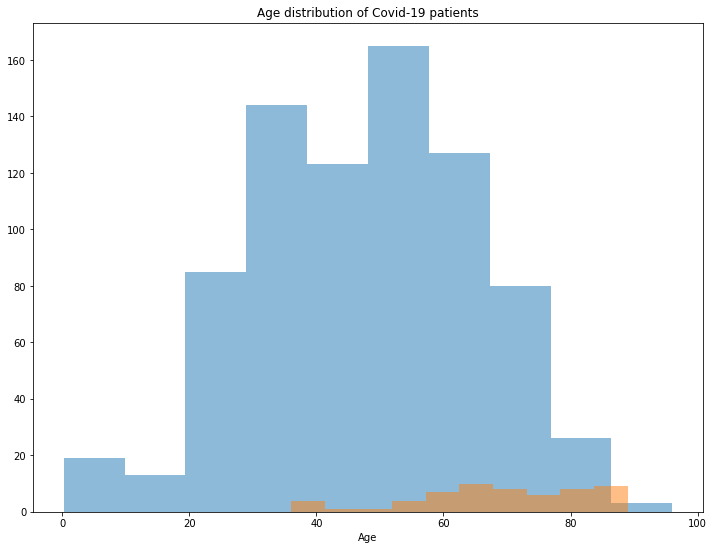

In [5]:
plt.figure(figsize=(12,9))
plt.hist(small_data[small_data['death'] == '0']['age'], alpha=0.5)
plt.hist(small_data[small_data['death'] != '0']['age'], alpha=0.5)
plt.xlabel('Age')
plt.title('Age distribution of Covid-19 patients')
plt.show()

#### Handling Nulls
With only about 1000 observations in this dataset, we want to keep as many records as possible and handle the nulls with educated 

##### Gender
Gender is relatively evenly split and for patients where gender data is not available, I decided to fill with random choice.

##### Age
The age distribution is relatively normal with a few outliers of children and elderly patients, so I filled the nulls by median value here.

##### Death
Luckily for us our target variable has no nulls, but some different value types in the column between binary 0/1 and date values.  0 indicates recovery and date values and 1 indicate death.  I adjusted the values of this column so that it's either a 1 or 0.

##### Summary
The only purpose of keeping the summary column is to extract some symptom data if available, so I'm just filling the nulls with a blank string for ease of coding later.

##### Symptom
I created a function that takes the comma delimited symptom column as an input and returns all of the unique distinct symptoms.  I then parse the summary column for any recognized symptoms and add them to the symptom column for that patient.  For all remaining nulls in this column I set as a string called 'No recorded symptoms'

In [6]:
def get_symptoms(input_symptoms):
    symptoms = pd.Series(input_symptoms.unique()).astype(str)
    symptoms = symptoms.sort_values(ascending=True).reset_index(drop=True)
    all_symptoms = []
    for symptom in symptoms:
        split_symp = symptom.split(', ')
        for i in range(len(split_symp)):
            all_symptoms.append(split_symp[i])
    all_symptoms = pd.Series(all_symptoms).astype(str)
    all_symptoms = all_symptoms.sort_values(ascending=True).reset_index(drop=True)
    all_symptoms = all_symptoms.unique()
    return all_symptoms

In [7]:
small_data.loc[:, 'gender'] = small_data['gender'].fillna(
    pd.Series(np.random.choice(['male', 'female'], 
                               size=len(small_data.index))))
small_data.loc[:, 'age'] = small_data['age'].fillna(int(small_data['age'].median()))
small_data.loc[:, 'death'] = small_data['death'].where(small_data['death'] == '0', '1')
small_data.loc[:, 'summary'] = small_data['summary'].fillna('')

all_symptoms = get_symptoms(small_data['symptom'])

for i in small_data.index:
    symp = ", ".join([x for x in all_symptoms if(x in small_data['summary'][i])])
    if symp != "":
        if small_data.iloc[i].isna().mean() > 0:
            small_data.iloc[i] = small_data.iloc[i].fillna(symp)
        else:
            small_data.iloc[i, 3] = ", ".join([small_data.iloc[i, 3], symp])
small_data.loc[:, 'symptom'] = small_data['symptom'].fillna('No recorded symptoms')

display(
    small_data.head(),
    all_symptoms
)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,gender,death,symptom,summary
0,66.0,male,0,pneumonia,First confirmed imported COVID-19 pneumonia pa...
1,56.0,female,0,"fever, pneumonia",First confirmed imported COVID-19 pneumonia pa...
2,46.0,male,0,No recorded symptoms,First confirmed imported cases in Zhejiang: pa...
3,60.0,female,0,"fever, pneumonia",new confirmed imported COVID-19 pneumonia in T...
4,58.0,male,0,"fever, pneumonia",new confirmed imported COVID-19 pneumonia in T...


array(['abdominal pain', 'aching muscles', 'breathlessness',
       'chest discomfort', 'chest pain', 'chill', 'chills', 'cold',
       'cough', 'cough with sputum', 'coughing', 'diarrhea',
       'difficult in breathing', 'difficulty breathing', 'dyspnea',
       'fatigue', 'feaver', 'feve\\', 'fever', 'flu', 'flu symptoms',
       'headache', 'heavy head', 'high fever', 'itchy throat',
       'joint pain', 'loss of appetite', 'malaise', 'mild cough',
       'mild fever', 'muscle aches', 'muscle cramps', 'muscle pain',
       'myalgia', 'myalgias', 'nan', 'nasal discharge', 'nausea',
       'physical discomfort', 'pneumonia', 'reflux',
       'respiratory distress', 'runny nose', 'shortness of breath',
       'sneeze', 'sore body', 'sore throat', 'sputum', 'thirst',
       'throat discomfort', 'throat pain', 'tired', 'vomiting'],
      dtype=object)

Looking at the list of symptoms, there are a lot of typos and places where symptoms can be aggregated.  I compiled those into a a dictionary and replaced them in the symptoms column and then recompiled the symptoms list with the function

In [8]:
symptom_replace_dict = {
    'chills': 'chill',
    'coughing': 'cough',
    'mild cough': 'cough',
    'breathlessness': 'difficulty breathing',
    'difficult in breathing': 'difficulty breathing',
    'dyspnea': 'difficulty breathing',
    'shortness of breath': 'difficulty breathing',
    'respiratory distress': 'difficulty breathing',
    'feaver': 'fever',
    'feve\\\\': 'fever',
    'high fever': 'fever',
    'mild fever': 'fever',
    'flu symptoms': 'flu',
    'myalgias': 'myalgia',
    'aching muscles': 'muscle pain',
    'muscle cramps': 'muscle pain',
    'muscle aches': 'muscle pain',
    'reflux': 'chest discomfort',
    'chest pain': 'chest discomfort',
    'throat discomfort': 'sore throat',
    'throat pain': 'sore throat',
    'itchy throat': 'sore throat',
    'cough with sputum': 'cough, sputum',
    'tired': 'malaise',
    'sore body': 'malaise',
    'runny nose': 'nasal discharge',
    'sneeze': 'nasal discharge',
    'heavy head': 'headache',
    'fatigue': 'myalgia',
    'joint pain': 'myalgia',
    'physical discomfort': 'myalgia',
    'nan': 'No recorded symptoms'
}
for typos in symptom_replace_dict:
    small_data.loc[:, 'symptom'] = small_data['symptom'].str.replace(typos, symptom_replace_dict[typos])

all_symptoms = get_symptoms(small_data['symptom'])
all_symptoms

array(['No recorded symptoms', 'abdominal pain', 'chest discomfort',
       'chill', 'cold', 'cough', 'diarrhea', 'difficulty breathing',
       'fever', 'flu', 'headache', 'loss of appetite', 'malaise',
       'muscle pain', 'myalgia', 'nasal discharge', 'nausea', 'pneumonia',
       'sore throat', 'sputum', 'thirst', 'vomiting'], dtype=object)

The symptoms alone would be an addition of 22 new features so let's look at the instances and see what we should keep and what symptom should be aggregated

In [9]:
sympcount = pd.DataFrame(index=all_symptoms, columns=['count'])
for i in all_symptoms:
    sympcount.loc[i, :] = sympcount.loc[i, :].fillna((small_data['symptom'].str.count(i)).sum())
sympcount = sympcount.sort_values(by='count', ascending=False)
sympcount

,count
No recorded symptoms,602
fever,459
cough,279
pneumonia,208
sore throat,78
malaise,63
myalgia,50
difficulty breathing,46
chill,43
headache,35


So with this in mind, let's make 10 observations our cutoff point and aggregate the remaining to the 'No recorded symptoms'

In [10]:
secondaryfilter = sympcount[sympcount['count'] < 10].index
for key in secondaryfilter:
    small_data.loc[:, 'symptom'] = small_data['symptom'].str.replace(key, 'No recorded symptoms')
small_data.loc[:, 'symptom'] = small_data['symptom'].fillna('No recorded symptoms')
all_symptoms = get_symptoms(small_data['symptom'])
small_data.head()

,age,gender,death,symptom,summary
0,66.0,male,0,pneumonia,First confirmed imported COVID-19 pneumonia pa...
1,56.0,female,0,"fever, pneumonia",First confirmed imported COVID-19 pneumonia pa...
2,46.0,male,0,No recorded symptoms,First confirmed imported cases in Zhejiang: pa...
3,60.0,female,0,"fever, pneumonia",new confirmed imported COVID-19 pneumonia in T...
4,58.0,male,0,"fever, pneumonia",new confirmed imported COVID-19 pneumonia in T...


Now that we've extracted the information we can, let's drop the summary column.  The symptom column is unique in that a patient can have multiple symptoms, so this is not a column we can OneHot encode.  I loop through and create a column for each symptom and add a value of 1 if the symptom exists in the symptom column and all remaining values get filled with a zero.  Because of how some of the data was put in, we have our N/A value alongside valid symptoms, so if a symptom exists with a the N/A, we drop the N/A for that observation

In [11]:
newdf = small_data.drop(columns='summary')
for patient in newdf.index:
    patient_symptoms = newdf.loc[patient, 'symptom'].split(', ')
    for symptom in patient_symptoms:
        newdf.loc[patient, symptom] = 1
newdf = newdf.fillna(0)

for patient in newdf.index:
    if (newdf.loc[patient, 'No recorded symptoms'] == 1) & (newdf.loc[patient, 'pneumonia':].sum() > 1):
        #13 and 29
        newdf.loc[patient, 'No recorded symptoms'] = 0

newdf = newdf.drop(columns=['symptom'])
display(
    newdf.head(),
    newdf.describe()
)

,age,gender,death,pneumonia,fever,No recorded symptoms,cough,difficulty breathing,sore throat,chill,myalgia,nasal discharge,diarrhea,vomiting,malaise,headache,sputum,muscle pain
0,66.0,male,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,56.0,female,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46.0,male,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,female,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58.0,male,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,age,pneumonia,fever,No recorded symptoms,cough,difficulty breathing,sore throat,chill,myalgia,nasal discharge,diarrhea,vomiting,malaise,headache,sputum,muscle pain
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,49.821889,0.189862,0.235945,0.529032,0.149309,0.024885,0.041475,0.014747,0.022120,0.015668,0.009217,0.005530,0.030415,0.018433,0.010138,0.008295
std,16.101468,0.392372,0.424784,0.499387,0.356557,0.155846,0.199477,0.120592,0.147141,0.124245,0.095604,0.074192,0.171805,0.134574,0.100223,0.090740
min,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now, with our data ready, we can begin building a model

## Model Building

In [12]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
age                     1085 non-null float64
gender                  1085 non-null object
death                   1085 non-null object
pneumonia               1085 non-null float64
fever                   1085 non-null float64
No recorded symptoms    1085 non-null float64
cough                   1085 non-null float64
difficulty breathing    1085 non-null float64
sore throat             1085 non-null float64
chill                   1085 non-null float64
myalgia                 1085 non-null float64
nasal discharge         1085 non-null float64
diarrhea                1085 non-null float64
vomiting                1085 non-null float64
malaise                 1085 non-null float64
headache                1085 non-null float64
sputum                  1085 non-null float64
muscle pain             1085 non-null float64
dtypes: float64(16), object(2)
memory usage: 152.7+ KB


In [13]:
newdf['death'].value_counts()

0    1022
1      63
Name: death, dtype: int64

As we saw in the histogram, our target is heavily imbalanced, so after we do our train-test split, I made the decision to oversample my X data.  This came after multiple iterations of model building and hyperparameter tuning and still finding the models would rarely guess 1 when maximizing recall is what we ideally want for this type of model.

#### Age
For my first model, I'm treating age as a numeric value, but I also want to compare this to a model where age is a categorical value for Child/Adult/Elderly

## First Model - Age as Numeric

In [14]:
X1 = newdf.drop(columns=['death'])
y1 = newdf['death']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=36, stratify=y1)

In [15]:
X1_death = X1_train[X1_train.index.isin(y1_train[y1_train == '1'].index)].sample(
    500, 
    replace=True, 
    random_state=36
).reset_index(drop=True)

X1_recov = X1_train[X1_train.index.isin(y1_train[y1_train == '0'].index)].sample(
    500, 
    replace=True, 
    random_state=36
).reset_index(drop=True)

X1_train_ovs = pd.concat([X1_death, X1_recov])
y1_train_ovs = pd.Series(['1' for i in range(500)] + ['0' for i in range(500)], name='death')

As I iterated through grid optimization, I added parameters to the constant values list when I saw that they weren't changing 

In [120]:
preprocessing = ColumnTransformer(
    [('encode_cats', OneHotEncoder(drop='first'), ['gender']),
     ('scaler_nums', StandardScaler(), ['age'])
    ], remainder='passthrough')

pipeline = Pipeline([('preprocessing', preprocessing), 
                     ('xgb', XGBClassifier(
                         max_features='sqrt', 
                         max_depth=8, 
                         learning_rate=1,
                         n_estimators=3300
                     ))])

xgb_grid = {
#     "xgb__subsample": [], 
#     "xgb__C": np.logspace(-4, 1, 6),
#     "xgb__max_depth": np.arange(1, 10),
#     "xgb__learning_rate": np.linspace(0, 10, 11).astype(int),
#     "xgb__n_estimators": np.linspace(3000, 4000, 11).astype(int),

}

age_num_model = GridSearchCV(pipeline, param_grid=xgb_grid, verbose=1, n_jobs=-1) 
age_num_model.fit(X1_train_ovs, y1_train_ovs)

y1_pred = age_num_model.predict(X1_test)
y1_pred_prob = pd.DataFrame(age_num_model.predict_proba(X1_test),
                           columns=['Guess_recovery', 'Guess_death']
                          )

model1_cm = pd.DataFrame(confusion_matrix(y1_test, y1_pred),
                        index=['Predict_Recovery', 'Predict_Death'],
                        columns=['Actual_Recovery', 'Actual_Death'])
model1_cr = classification_report(y1_test, y1_pred)

feature_importances1 = pd.DataFrame(index=X1.columns, columns=['feature_importance'])
feature_importances1['feature_importance'] = age_num_model.best_estimator_._final_estimator.feature_importances_

display(
    age_num_model.best_params_,
    age_num_model.score(X1_train_ovs, y1_train_ovs),
    age_num_model.score(X1_test, y1_test),
    print(model1_cr),
    model1_cm,
    feature_importances1.sort_values(by='feature_importance', ascending=False)
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.9s finished


              precision    recall  f1-score   support

           0       0.96      0.93      0.95       256
           1       0.29      0.44      0.35        16

    accuracy                           0.90       272
   macro avg       0.63      0.69      0.65       272
weighted avg       0.92      0.90      0.91       272



{}

0.958

0.9044117647058824

None

,Actual_Recovery,Actual_Death
Predict_Recovery,239,17
Predict_Death,9,7


,feature_importance
difficulty breathing,0.412899
myalgia,0.375511
cough,0.102883
sore throat,0.076280
fever,0.024821
pneumonia,0.004014
gender,0.002325
age,0.000972
No recorded symptoms,0.000294
malaise,0.000000


Still having some issues with low recall on predicting death, let's try and see how the model will do if we change age to categorical

## Second Model - Age as Categorical

In [112]:
newdf_catage = newdf.copy()

newdf_catage['age'] = pd.cut(
    newdf_catage['age'], 
    [0, 50, newdf_catage['age'].max() + 1], 
    True, 
    ['Young', 'Old']
)

X2 = newdf_catage.drop(columns=['death'])
y2 = newdf_catage['death']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=36, stratify=y2)

In [113]:
X2_death = X2_train[X2_train.index.isin(y2_train[y2_train == '1'].index)].sample(
    500, 
    replace=True, 
    random_state=36
).reset_index(drop=True)

X2_recov = X2_train[X2_train.index.isin(y2_train[y2_train == '0'].index)].sample(
    500, 
    replace=True, 
    random_state=36
).reset_index(drop=True)

X2_train_ovs = pd.concat([X2_death, X2_recov])
y2_train_ovs = pd.Series(['1' for i in range(500)] + ['0' for i in range(500)], name='death')

In [121]:
preprocessing2 = ColumnTransformer(
    [('encode_cats', OneHotEncoder(drop='first'), ['gender', 'age']),
    ], remainder='passthrough')

pipeline2 = Pipeline([('preprocessing', preprocessing2), 
                     ('xgb', XGBClassifier(
                         max_features='sqrt', 
                         max_depth=3, 
                         learning_rate=1,
                         n_estimators=50
                     ))])

xgb_grid2 = {
#     "xgb__subsample": [], 
#     "xgb__C": np.logspace(-4, 1, 6),
#     "xgb__max_depth": np.arange(1, 10),
#     "xgb__learning_rate": np.linspace(0, 10, 11).astype(int),
#     "xgb__n_estimators": np.linspace(45, 55, 11).astype(int),

}

age_cat_model = GridSearchCV(pipeline2, param_grid=xgb_grid2, verbose=1, n_jobs=-1) 
age_cat_model.fit(X2_train_ovs, y2_train_ovs)

y2_pred = age_cat_model.predict(X2_test)
y2_pred_prob = pd.DataFrame(age_cat_model.predict_proba(X2_test),
                           columns=['Guess_recovery', 'Guess_death']
                          )

model2_cm = pd.DataFrame(confusion_matrix(y2_test, y2_pred),
                        index=['Predict_Recovery', 'Predict_Death'],
                        columns=['Actual_Recovery', 'Actual_Death'])
model2_cr = classification_report(y2_test, y2_pred)

feature_importances2 = pd.DataFrame(index=X2.columns, columns=['feature_importance'])
feature_importances2['feature_importance'] = age_cat_model.best_estimator_._final_estimator.feature_importances_

display(
    age_cat_model.best_params_,
    age_cat_model.score(X2_train_ovs, y2_train_ovs),
    age_cat_model.score(X2_test, y2_test),
    print(model2_cr),
    model2_cm,
    feature_importances2.sort_values(by='feature_importance', ascending=False),
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


              precision    recall  f1-score   support

           0       0.99      0.77      0.87       256
           1       0.18      0.81      0.30        16

    accuracy                           0.78       272
   macro avg       0.58      0.79      0.58       272
weighted avg       0.94      0.78      0.83       272



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


{}

0.828

0.7757352941176471

None

,Actual_Recovery,Actual_Death
Predict_Recovery,198,58
Predict_Death,3,13


,feature_importance
pneumonia,0.543557
gender,0.196873
malaise,0.093801
age,0.048860
fever,0.031332
myalgia,0.028931
cough,0.023476
sore throat,0.017283
No recorded symptoms,0.008089
difficulty breathing,0.007798


## Results

In [124]:
display(
    print(model1_cr),
    print(model2_cr)
)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       256
           1       0.29      0.44      0.35        16

    accuracy                           0.90       272
   macro avg       0.63      0.69      0.65       272
weighted avg       0.92      0.90      0.91       272

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       256
           1       0.18      0.81      0.30        16

    accuracy                           0.78       272
   macro avg       0.58      0.79      0.58       272
weighted avg       0.94      0.78      0.83       272



None

None

In terms of accuracy, the first model scored significantly better.  However, let's take a look at the models side-by-side

### Feature Importances

In [119]:
display(feature_importances1.sort_values(by='feature_importance', ascending=False),
        feature_importances2.sort_values(by='feature_importance', ascending=False)
)

,feature_importance
difficulty breathing,0.412899
myalgia,0.375511
cough,0.102883
sore throat,0.076280
fever,0.024821
pneumonia,0.004014
gender,0.002325
age,0.000972
No recorded symptoms,0.000294
malaise,0.000000


,feature_importance
pneumonia,0.543557
gender,0.196873
malaise,0.093801
age,0.048860
fever,0.031332
myalgia,0.028931
cough,0.023476
sore throat,0.017283
No recorded symptoms,0.008089
difficulty breathing,0.007798


It's actually interesting to see how much lower age and gender were weighted when age was a numeric column and there are also differences in which symptom was given the higher importance.

### Confusion Matrices

In [ ]:
display(model1_cm,
        model2_cm
       )

## Conclusion

